# Clustering

## Problem 1: Segment Customers

The problem that we are going to solve in this assignment is to segment customers into different groups based on their shopping trends.

In [74]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

### Load data

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [75]:
# load the data
shopping_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/shopping_data.csv')
shopping_data.rename(
    columns={
        'CustomerID': 'customer_id',
        'Genre': 'genre',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    },
    inplace=True
)
display(shopping_data.head())

# TODO: retain only anual_income and spending_score for clustering
shopping_data = shopping_data.drop(columns=['age','customer_id','genre'])
shopping_data

,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


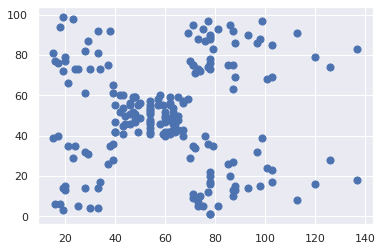

In [76]:
plt.scatter(shopping_data.loc[:,'annual_income'], shopping_data.loc[:, 'spending_score'], s=50);

### Hierarchical Clustering
First, we will apply hierarchical clustering and use dendrogram to help find the number of clusters within the data.

**TODO: Use dendrogram to plot hierarchical clustering and find the number of clusters that makes sense.**

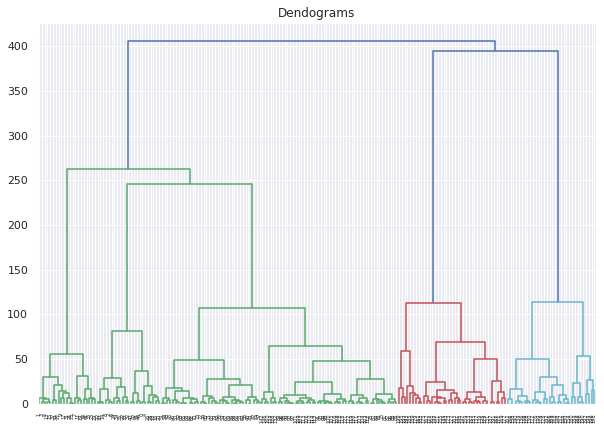

In [77]:
#dendogram
plt.figure(figsize=(10, 7))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(shopping_data, method='ward')) 

From above dendogram, we can say that 5 clusters are required for Shopping_data.

**TODO: Apply hierarchical clustering based on the number of clusters you pick from the dendrogram, and visualize the results using scatterplot.**

Text(0, 0.5, 'spending_score')

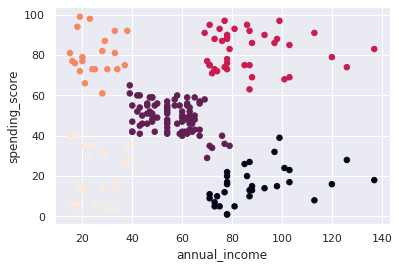

In [78]:
# TODO

#no of cluster = 5
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_ward = hc.fit_predict(shopping_data)  

plt.scatter(shopping_data.loc[:,'annual_income'], shopping_data.loc[:, 'spending_score'], c=y_ward, s=30 )
plt.xlabel("annual_income")
plt.ylabel("spending_score")

### K-means Clustering
Then, we will apply k-means to the same data and visualize the results.

**TODO: Vary the number of K from 2 to 10 and plot the Sum of Squared Error (SSE) as K increases and pick up the value of K that makes sense.**

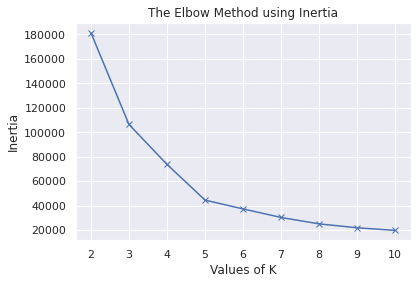

In [79]:
# TODO
from sklearn.cluster import KMeans

inertias = []
K = range(2, 11)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(shopping_data)
	inertias.append(kmeanModel.inertia_)
	

plt.plot(K, inertias,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


From the above elbow curve, no of clusters = 5 make more sense

**TODO: Cluster the data using K-means based on the pre-defined value of K from the previous step and and visualize the results using scatterplot. **

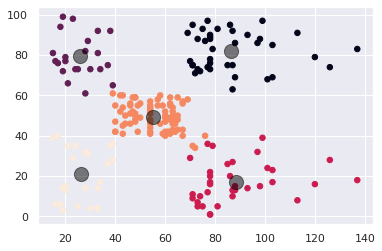

In [81]:
# TODO
#K =3 from above result
kmeanModel= KMeans(5).fit(shopping_data)
y_kmeans = kmeanModel.predict(shopping_data)

plt.scatter(shopping_data.loc[:,'annual_income'], shopping_data.loc[:, 'spending_score'], c=y_kmeans, s=30 )

centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)




## Problem 2: Clustering (Manually)

For the following dataset, perform the clustering “by hand”:

17 28 50 60 80 89 150 167 171 189 
1. 	Use the K-means algorithm with K= 3 to cluster the data
2. 	Use hierarchical agglomerative clustering with single linkage to cluster the data
3. 	Use hierarchical agglomerative clustering with complete linkage to cluster the data
4. 	For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189

## Bonus points
Use the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means. You can use paper title or abstract to build your features using [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model).

1. Vary the number of K from 2 to 6 and show if the results vary and assess the clusters obtained.

2. Make a case regarding which clusters ‘make sense’ e.g., is there a cluster were papers on reinforcement learning are together vs. another cluster which has papers on deep learning.

In [25]:
# Load the Relevant libraries
import sklearn as sk

# URL for the AAAI (UW Repository)
aaai_data = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/AAAI2014AcceptedPapers.csv")

In [26]:
aaai_data.head()



,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


In [82]:
title = aaai_data['title'] #considering column 'Title' for bag of words

In [83]:
from keras.preprocessing.text import Tokenizer

def print_bow(title: str) -> None:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(title)
    sequences = tokenizer.texts_to_sequences(title)
    word_index = tokenizer.word_index 
    bow = {}
    for key in word_index:
        bow[key] = sequences[0].count(word_index[key])

    print(f"Bag of word sentence 1:\n{bow}")
    print(f'We found {len(word_index)} unique tokens.')

bg= print_bow(title)



Bag of word sentence 1:
{'for': 0, 'of': 0, 'in': 0, 'and': 0, 'with': 0, 'a': 0, 'learning': 1, 'the': 0, 'based': 0, 'using': 0, 'on': 0, 'multi': 0, 'to': 0, 'by': 0, 'model': 0, 'planning': 0, 'via': 0, 'search': 0, 'social': 0, 'online': 0, 'from': 0, 'classification': 0, 'analysis': 0, 'information': 0, 'sparse': 0, 'data': 0, 'supervised': 0, 'networks': 0, 'multiple': 0, 'models': 0, 'probabilistic': 0, 'image': 0, 'view': 0, 'linear': 0, 'large': 0, 'robust': 0, 'games': 0, 'language': 0, 'label': 0, 'optimization': 0, 'constraints': 0, 'selection': 0, 'modeling': 0, 'non': 0, 'natural': 0, 'stochastic': 0, 'agent': 0, 'domain': 0, 'transfer': 1, 'an': 0, 'efficient': 0, 'feature': 0, 'solving': 0, 'optimal': 0, 'time': 0, 'prediction': 0, 'adaptive': 0, 'knowledge': 0, 'embedding': 0, 'instance': 0, 'rank': 0, 'temporal': 0, 'clustering': 0, 'reasoning': 0, 'robot': 0, 'game': 0, 'constraint': 0, 'task': 0, 'structure': 0, 'design': 0, 'bayesian': 1, 'representation': 0, 'sem

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score

In [59]:
title[title.duplicated(keep=False)] #to verify duplicates

Series([], Name: title, dtype: object)

In [62]:
from sklearn.feature_extraction import text
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = title.values. #title column
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [85]:
word_features = vectorizer.get_feature_names()
print(len(word_features))

1265


In [86]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [87]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50])

1009
['aaai', 'abduct', 'abox', 'absorb', 'abstract', 'access', 'accur', 'achiev', 'acoust', 'acquir', 'acquisit', 'action', 'activ', 'ad', 'adapt', 'address', 'adjust', 'admm', 'adopt', 'adversari', 'advertis', 'advic', 'advisor', 'aerosol', 'affect', 'agenda', 'agent', 'aggreg', 'ai', 'air', 'algorithm', 'align', 'alloc', 'alter', 'alzheim', 'ambigu', 'analog', 'analogu', 'analysi', 'analyz', 'anonym', 'answer', 'anytim', 'applic', 'approach', 'approxim', 'argument', 'aria', 'array', 'artifici']


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [88]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


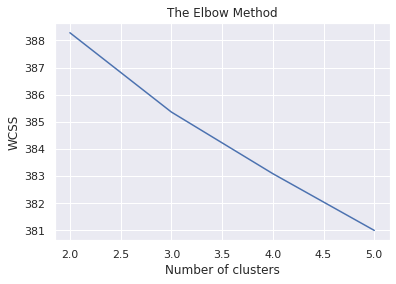

In [89]:
wcss = []
for i in range(2,6):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,6),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [71]:
#iteration 1:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) 
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : learn, multi, spars, transfer, view, model, instanc, imag, task, composit, onlin, bayesian, represent, robust, featur, local, activ, adapt, dictionari, low, network, dynam, classif, cluster, data
1 : base, plan, model, domain, data, adapt, robot, algorithm, inform, uncertain, learn, complex, stochast, constraint, optim, environ, uncertainti, logic, approxim, prefer, compil, agent, experi, heterogen, hybrid
2 : use, game, search, social, predict, model, general, linear, optim, network, constraint, time, effici, structur, analysi, larg, select, classif, design, user, reason, program, inform, generat, onlin


In [91]:
print("Top terms per cluster for K=3:")
true_k = 3
#order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 restarted
 electric
 parametrized
 incentivizing
 cascading
 power
 elicitation
 partial
 graph
 joule
Cluster 1:
 auctions
 logic
 math
 incentivizing
 decentralized
 actions
 citizen
 ontology
 classes
 generalization
Cluster 2:
 inter
 manifold
 augmented
 restarted
 deepening
 power
 interaction
 propagation
 abstraction
 restarting


In [93]:
#Iteration 2:

kmeans = KMeans(n_clusters = 4, n_init = 20, n_jobs = 1) 
kmeans.fit(X3)
print("Top terms per cluster:")
true_k = 4
#order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 restarted
 electric
 parametrized
 incentivizing
 cascading
 power
 elicitation
 partial
 graph
 joule
Cluster 1:
 auctions
 logic
 math
 incentivizing
 decentralized
 actions
 citizen
 ontology
 classes
 generalization
Cluster 2:
 inter
 manifold
 augmented
 restarted
 deepening
 power
 interaction
 propagation
 abstraction
 restarting
Cluster 3:
 geographical
 prego
 indivisible
 regularization
 incentivizing
 fixing
 ridge
 open
 classwise
 expression


In [94]:
#Iteration 3:

kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1) 
kmeans.fit(X3)
print("Top terms per cluster for K=5:")
true_k = 5
#order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster for K=5:
Cluster 0:
 restarted
 electric
 parametrized
 incentivizing
 cascading
 power
 elicitation
 partial
 graph
 joule
Cluster 1:
 auctions
 logic
 math
 incentivizing
 decentralized
 actions
 citizen
 ontology
 classes
 generalization
Cluster 2:
 inter
 manifold
 augmented
 restarted
 deepening
 power
 interaction
 propagation
 abstraction
 restarting
Cluster 3:
 geographical
 prego
 indivisible
 regularization
 incentivizing
 fixing
 ridge
 open
 classwise
 expression
Cluster 4:
 color
 centralised
 affect
 environment
 golog
 recurrent
 mdps
 auctions
 leveraging
 echoes


Varied the number of K from 2 to 5 and verified the clusters

There are many words in each cluster and cluster with K =3 have more related words belong to same cluster.